In [123]:
import sys
!{sys.executable} -m pip install odfpy

In [2]:
import pandas as pd
import numpy as np
from re import sub
import datetime as dt
import time
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [3]:
bookings = pd.read_excel("data/HWY40/Fareharbor/Bookings--2020-10-01--2021-03-13.ods", engine="odf", header=1)
bookings.head()

,Booking ID,Cancelled?,Created At,Created At Time,Created At Date,Created By,Last Booked At,Last Booked At Date,Last Booked At Time,Last Booked By,...,Availability ID,Availability Day,Headline,Private Headline,Contact Language,Subscribed to text messages?,Subscribed to Email?,# of Pax,Online Booking Reference,Pickup Time
0,#67251622,No,2020-12-17 @ 08:18pm,08:18pm,2020-12-17,Online,2020-12-18 @ 08:42am,2020-12-18,08:42am,Jami Turman,...,#531950708,Friday,Please select your first day of skiing! Book now!,NaN,English (US),No,No,2,NaN,NaN
1,#67152670,No,2020-12-16 @ 08:50am,08:50am,2020-12-16,Online,2020-12-16 @ 08:50am,2020-12-16,08:50am,Online,...,#531950708,Friday,Please select your first day of skiing! Book now!,NaN,English (US),Subscribed,No,2,NaN,NaN
2,#67251680,No,2020-12-17 @ 08:18pm,08:18pm,2020-12-17,Online,2020-12-18 @ 08:43am,2020-12-18,08:43am,Jami Turman,...,#532305509,Friday,Please select your first day of skiing! Book now!,NaN,English (US),No,No,2,NaN,NaN
3,#67152672,No,2020-12-16 @ 08:50am,08:50am,2020-12-16,Online,2020-12-16 @ 08:50am,2020-12-16,08:50am,Online,...,#532310577,Friday,Please select your first day of skiing! Book now!,NaN,English (US),Subscribed,No,5,NaN,NaN
4,#67354515,No,2020-12-16 @ 08:50am,08:50am,2020-12-16,Online,2020-12-19 @ 05:45pm,2020-12-19,05:45pm,Jami Turman,...,#532305510,Saturday,Please select your first day of skiing! Book now!,NaN,English (US),Subscribed,No,3,NaN,NaN


# Questions for bookings
- 2 columns completely missing?

In [4]:
campaigns = pd.read_excel("data/HWY40/Fareharbor/hwy40skidelivery-campaigns-summary-from-2020-10-11-to-2021-03-13-CLEAN.ods", engine="odf", sheet_name="Campaign_dates")
campaigns.head()

,campaign,Start,End
0,Save 50% off purchase,12/26/2020 @ 12:00am,1/1/2021 @ 12:00am
1,Skicoupons.com,1/21/21 @ 11:11am,NaN


In [5]:
campaign_totals = pd.read_excel("data/HWY40/Fareharbor/hwy40skidelivery-campaigns-summary-from-2020-10-11-to-2021-03-13-CLEAN.ods", engine="odf", sheet_name="Totals")
campaign_totals.head()

,Item,#,Subtotal,Tax,Total,% of Report Sum Booking Totals,Revenue Collected,Receivable from Affiliate,Payable to Affiliate,Net Revenue
0,Elite Ski Package,22,"$8,034.17",$456.05,"$8,490.22",15.7%,"$8,285.22",$0.00,$0.00,"$8,121.91"
1,Summit Ski Package,37,"$9,282.34",$517.45,"$9,799.79",18.13%,"$9,759.79",$0.00,$0.00,"$9,564.46"
2,Mountain Ski Package,100,"$20,099.29","$1,133.72","$21,233.01",39.27%,"$21,189.01",$0.00,$0.00,"$20,755.56"
3,Base Ski Package,36,"$5,988.14",$338.53,"$6,326.67",11.7%,"$6,307.67",$0.00,$0.00,"$6,177.18"
4,Junior Mountain Ski Package,14,"$2,528.45",$141.14,"$2,669.59",4.94%,"$2,669.59",$0.00,$0.00,"$2,616.14"


In [6]:
discount = pd.read_excel("data/HWY40/Fareharbor/hwy40skidelivery-campaigns-summary-from-2020-10-11-to-2021-03-13-CLEAN.ods", engine="odf", sheet_name="50%")

for i in range(len(discount)):
    discount['Subtotal'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Subtotal'].iloc[i]))
    discount['Tax'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Tax'].iloc[i]))
    discount['Total'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Total'].iloc[i]))
    discount['Revenue Collected'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Revenue Collected'].iloc[i]))
    discount['Receivable from Affiliate'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Receivable from Affiliate'].iloc[i]))
    discount['Payable to Affiliate'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Payable to Affiliate'].iloc[i]))
    discount['Net Revenue'].iloc[i] = Decimal(sub(r'[^\d.]', '', discount['Net Revenue'].iloc[i]))
    discount['% of Report Sum Booking Totals'].iloc[i] = float(sub('%', '', discount['% of Report Sum Booking Totals'].iloc[i]))

discount.head()

C:\Users\jpabl\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Item,#,Subtotal,Tax,Total,% of Report Sum Booking Totals,Revenue Collected,Receivable from Affiliate,Payable to Affiliate,Net Revenue
0,Elite Ski Package,21,7808.17,442.26,8250.43,15.26,8045.43,0.00,0.00,7886.98
1,Summit Ski Package,37,9282.34,517.45,9799.79,18.13,9759.79,0.00,0.00,9564.46
2,Mountain Ski Package,94,18891.74,1065.74,19957.48,36.92,19913.48,0.00,0.00,19506.07
3,Base Ski Package,36,5988.14,338.53,6326.67,11.7,6307.67,0.00,0.00,6177.18
4,Junior Mountain Ski Package,14,2528.45,141.14,2669.59,4.94,2669.59,0.00,0.00,2616.14


In [7]:
cupon = pd.read_excel("data/HWY40/Fareharbor/hwy40skidelivery-campaigns-summary-from-2020-10-11-to-2021-03-13-CLEAN.ods", engine="odf", sheet_name="Cupons")

for i in range(len(cupon)):
    cupon['Subtotal'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Subtotal'].iloc[i]))
    cupon['Tax'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Tax'].iloc[i]))
    cupon['Total'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Total'].iloc[i]))
    cupon['Revenue Collected'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Revenue Collected'].iloc[i]))
    cupon['Receivable from Affiliate'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Receivable from Affiliate'].iloc[i]))
    cupon['Payable to Affiliate'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Payable to Affiliate'].iloc[i]))
    cupon['Net Revenue'].iloc[i] = Decimal(sub(r'[^\d.]', '', cupon['Net Revenue'].iloc[i]))
    cupon['% of Report Sum Booking Totals'].iloc[i] = float(sub('%', '', cupon['% of Report Sum Booking Totals'].iloc[i]))

cupon.head()

C:\Users\jpabl\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Item,#,Subtotal,Tax,Total,% of Report Sum Booking Totals,Revenue Collected,Receivable from Affiliate,Payable to Affiliate,Net Revenue
0,Elite Ski Package,1,226.00,13.79,239.79,0.44,239.79,0.00,0.00,234.93
1,Mountain Ski Package,6,1207.55,67.98,1275.53,2.36,1275.53,0.00,0.00,1249.49


In [8]:
#Totals
campaigns['End Subtotal'] = [discount['Subtotal'].sum(), cupon['Subtotal'].sum()]
campaigns['End Tax'] = [discount['Tax'].sum(), cupon['Tax'].sum()]
campaigns['End Total'] = [discount['Total'].sum(), cupon['Total'].sum()]
campaigns['End % of Report Sum Booking Totals'] = [discount['% of Report Sum Booking Totals'].sum(), cupon['% of Report Sum Booking Totals'].sum()]
campaigns['End Revenue Collected'] = [discount['Revenue Collected'].sum(), cupon['Revenue Collected'].sum()]
campaigns['End Receivable from Affiliate'] = [discount['Receivable from Affiliate'].sum(), cupon['Receivable from Affiliate'].sum()]
campaigns['End Payable to Affiliate'] = [discount['Payable to Affiliate'].sum(), cupon['Payable to Affiliate'].sum()]
campaigns['End Net Revenue'] = [discount['Net Revenue'].sum(), cupon['Net Revenue'].sum()]

#Means
campaigns['Mean Subtotal'] = [discount['Subtotal'].mean(), cupon['Subtotal'].mean()]
campaigns['Mean Tax'] = [discount['Tax'].mean(), cupon['Tax'].mean()]
campaigns['Mean Total'] = [discount['Total'].mean(), cupon['Total'].mean()]
campaigns['Mean % of Report Sum Booking Totals'] = [discount['% of Report Sum Booking Totals'].mean(), cupon['% of Report Sum Booking Totals'].mean()]
campaigns['Mean Revenue Collected'] = [discount['Revenue Collected'].mean(), cupon['Revenue Collected'].mean()]
campaigns['Mean Receivable from Affiliate'] = [discount['Receivable from Affiliate'].mean(), cupon['Receivable from Affiliate'].mean()]
campaigns['Mean Payable to Affiliate'] = [discount['Payable to Affiliate'].mean(), cupon['Payable to Affiliate'].mean()]
campaigns['Mean Net Revenue'] = [discount['Net Revenue'].mean(), cupon['Net Revenue'].mean()]

campaigns.head()

,campaign,Start,End,End Subtotal,End Tax,End Total,End % of Report Sum Booking Totals,End Revenue Collected,End Receivable from Affiliate,End Payable to Affiliate,End Net Revenue,Mean Subtotal,Mean Tax,Mean Total,Mean % of Report Sum Booking Totals,Mean Revenue Collected,Mean Receivable from Affiliate,Mean Payable to Affiliate,Mean Net Revenue
0,Save 50% off purchase,12/26/2020 @ 12:00am,1/1/2021 @ 12:00am,49748.63,2798.96,52547.59,97.2,52189.59,0.00,0.00,51134.17,5527.625556,310.995556,5838.621111,10.8,5798.843333,0.0,0.0,5681.574444
1,Skicoupons.com,1/21/21 @ 11:11am,NaN,1433.55,81.77,1515.32,2.8,1515.32,0.00,0.00,1484.42,716.775000,40.885000,757.660000,1.4,757.660000,0.0,0.0,742.210000


# Google analytics

In [59]:
# Read-in aquisition data
aquisition = pd.read_csv("data/HWY40/Google Analytics/aquisition.csv", header=6)

# Transform data types
aquisition['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in aquisition['Date']]
aquisition['Hour of Day'] = [dt.datetime.strptime(str(x), '%Y%m%d%H') for x in aquisition['Hour of Day']]
aquisition['Organic Searches'] = [int(x) for x in aquisition['Organic Searches']]
aquisition['AdX Clicks'] = [int(x) for x in aquisition['AdX Clicks']]
aquisition['AdX Coverage'] = [float(x.strip('%')) for x in aquisition['AdX Coverage']]
aquisition['AdX CTR'] = [float(x.strip('%')) for x in aquisition['AdX CTR']]
aquisition['AdX eCPM'] = [float(x.strip('$')) for x in aquisition['AdX eCPM']]
aquisition['AdX Impressions'] = [int(x) for x in aquisition['AdX Impressions']]
aquisition['AdX Clicks'] = [int(x) for x in aquisition['AdX Impressions / Session']]
aquisition['AdX Monetized Pageviews'] = [int(x) for x in aquisition['AdX Monetized Pageviews']]
aquisition['AdX Revenue'] = [float(x.strip('$')) for x in aquisition['AdX Revenue']]
aquisition['AdX Revenue / 1000 Sessions'] = [float(x.strip('$')) for x in aquisition['AdX Revenue / 1000 Sessions']]
aquisition['AdX Viewable Impressions %'] = [float(x.strip('%')) for x in aquisition['AdX Viewable Impressions %']]
aquisition['WeekDays'] = [dt.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').weekday() for x in aquisition['Date']]
aquisition.head()

,Date,Hour of Day,Organic Searches,AdX Clicks,AdX Coverage,AdX CTR,AdX eCPM,AdX Impressions,AdX Impressions / Session,AdX Monetized Pageviews,AdX Revenue,AdX Revenue / 1000 Sessions,AdX Viewable Impressions %,WeekDays
0,2021-01-03,2021-01-03 23:00:00,6,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,6
1,2021-03-17,2021-03-17 20:00:00,6,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,2
2,2021-01-14,2021-01-14 13:00:00,4,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,3
3,2021-01-25,2021-01-25 10:00:00,4,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
4,2021-03-10,2021-03-10 18:00:00,4,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,2


In [63]:
# Analysis aquisition
aquisition.describe(include="all")

<ipython-input-63-63ce731eafad>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aquisition.describe(include="all")
<ipython-input-63-63ce731eafad>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aquisition.describe(include="all")


,Date,Hour of Day,Organic Searches,AdX Clicks,AdX Coverage,AdX CTR,AdX eCPM,AdX Impressions,AdX Impressions / Session,AdX Monetized Pageviews,AdX Revenue,AdX Revenue / 1000 Sessions,AdX Viewable Impressions %,WeekDays
count,368,368,368.000000,368.0,368.0,368.0,368.0,368.0,368.0,368.0,368.0,368.0,368.0,368.000000
unique,88,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-02-07 00:00:00,2021-02-14 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-12-15 00:00:00,2020-12-15 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-20 00:00:00,2021-03-20 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.288043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.769022
std,NaN,NaN,0.667394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.966592
min,NaN,NaN,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,NaN,NaN,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


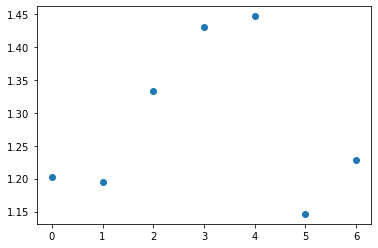

In [85]:
plt.scatter(x=aquisition['WeekDays'].unique(), y=aquisition.groupby('WeekDays').mean()['Organic Searches'])

In [164]:
# Read in behavior data
behavior_1 = pd.read_csv("data/HWY40/Google Analytics/behavior_1.csv", header=6)
behavior_2 = pd.read_csv("data/HWY40/Google Analytics/behavior_2.csv", header=6)
behavior_3 = pd.read_csv("data/HWY40/Google Analytics/behavior_3.csv", header=6)
behaviors = [behavior_1, behavior_2, behavior_3]
behavior = pd.concat(behaviors, ignore_index=True)

# Transform data types
behavior['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in behavior['Date']]
behavior['Hour of Day'] = [dt.datetime.strptime(str(x), '%Y%m%d%H') for x in behavior['Hour of Day']]
behavior['% Sessions with Search'] = [float(x.strip('%')) for x in behavior['% Sessions with Search']]
behavior['Avg. % Conversion Probability'] = [int(x) for x in behavior['Avg. % Conversion Probability']]
behavior['Avg. Search Probability'] = [int(x) for x in behavior['Avg. Search Depth']]
behavior['Avg. Value'] = [int(x) for x in behavior['Avg. Value']]
behavior['Entrances'] = [int(x) for x in behavior['Entrances']]
behavior['Entrances / Pageviews'] = [float(x.strip('%')) for x in behavior['Entrances / Pageviews']]
behavior['Event Value'] = [int(x) for x in behavior['Event Value']]
behavior['Events / Session with Event'] = [int(x) for x in behavior['Events / Session with Event']]
behavior['Results Pageviews'] = [int(x) for x in behavior['Results Pageviews']]
behavior['Search Depth'] = [int(x) for x in behavior['Search Depth']]
behavior['Search Exits'] = [int(x) for x in behavior['Search Exits']]
behavior['Search Refinements'] = [int(x) for x in behavior['Search Refinements']]
behavior['Sessions with Event'] = [int(x) for x in behavior['Sessions with Event']]
behavior['Sessions with Search'] = [int(x) for x in behavior['Sessions with Search']]
behavior['Time after Search'] = [dt.time(dt.datetime.strptime(str(x), '%H:%M:%S').hour, dt.datetime.strptime(str(x), '%H:%M:%S').minute, dt.datetime.strptime(str(x), '%H:%M:%S').second) for x in behavior['Time after Search']]
behavior['Time on Page'] = [dt.time(dt.datetime.strptime(str(x), '%H:%M:%S').hour, dt.datetime.strptime(str(x), '%H:%M:%S').minute, dt.datetime.strptime(str(x), '%H:%M:%S').second) for x in behavior['Time on Page']]
behavior['Time on Screen'] = [dt.time(dt.datetime.strptime(str(x), '%H:%M:%S').hour, dt.datetime.strptime(str(x), '%H:%M:%S').minute, dt.datetime.strptime(str(x), '%H:%M:%S').second) for x in behavior['Time on Screen']]
behavior['Total Events'] = [int(x) for x in behavior['Total Events']]
behavior['Unique Dimension Combinations'] = [int(x) for x in behavior['Unique Dimension Combinations']]
behavior['Unique Events'] = [int(x) for x in behavior['Unique Events']]
behavior['Avg. Search Probability'] = [int(x) for x in behavior['Avg. Search Probability']]
behavior['Time on Page'] = [dt.timedelta(hours=x.hour,minutes=x.minute,seconds=x.second).total_seconds() for x in behavior['Time on Page']]
behavior.head()

,Date,Hour of Day,Screen Name,% Sessions with Search,Avg. % Conversion Probability,Avg. Search Depth,Avg. Value,Entrances,Entrances / Pageviews,Event Value,Events / Session with Event,Results Pageviews,Search Depth,Search Exits,Search Refinements,Sessions with Event,Sessions with Search,Time after Search,Time on Page,Time on Screen,Total Events,Unique Dimension Combinations,Unique Events,Avg. Search Probability
0,2020-12-14,2020-12-14 19:00:00,hwy40skidelivery.com/,0.0,0,0,0,1,100.0,0,0,0,0,0,0,0,0,00:00:00,4.0,00:00:00,0,1,0,0
1,2020-12-14,2020-12-14 19:00:00,hwy40skidelivery.com/packages/,0.0,0,0,0,0,0.0,0,1,0,0,0,0,1,0,00:00:00,5.0,00:00:00,1,1,1,0
2,2020-12-15,2020-12-15 06:00:00,hwy40skidelivery.com/,0.0,0,0,0,2,100.0,0,0,0,0,0,0,0,0,00:00:00,13.0,00:00:00,0,2,0,0
3,2020-12-15,2020-12-15 06:00:00,hwy40skidelivery.com/faq/,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,00:00:00,0.0,00:00:00,0,1,0,0
4,2020-12-15,2020-12-15 06:00:00,hwy40skidelivery.com/packages/,0.0,0,0,0,0,0.0,0,2,0,0,0,0,1,0,00:00:00,58.0,00:00:00,2,1,1,0


In [170]:
# Analysis behavior
behavior.describe(include="all")

pages = pd.DataFrame(columns=['page', 'time'])
screens = behavior['Screen Name'].unique()
for i in range(len(screens)):
    end = screens[i].find('.com')
    pages = pages.append({'page': screens[i][0:end], 'time': behavior.groupby('Screen Name').mean()['Time on Page'][i]}, ignore_index=True)


<ipython-input-170-f659294bac8b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  behavior.describe(include="all")
<ipython-input-170-f659294bac8b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  behavior.describe(include="all")


(0.0, 250.0)

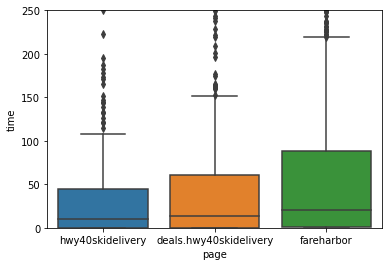

In [199]:
#plt.scatter(x=pages['page'].unique(), y=pages.groupby('page').mean()['time'])
sns.boxplot(x=pages['page'], y=pages['time'])
plt.ylim(0,250)

In [22]:
# Read in city data
city1 = pd.read_csv("data/HWY40/Google Analytics/city_1.csv", header=6)
city2 = pd.read_csv("data/HWY40/Google Analytics/city_2.csv", header=6)
cities = [city1, city2]
city = pd.concat(cities, ignore_index=True)

# Transform data types
city['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in city['Date']]
city['Users'] = [int(x) for x in city['Users']]
city['New Users'] = [int(x) for x in city['New Users']]
city['Sessions'] = [int(x) for x in city['Sessions']]
city['Bounce Rate'] = [float(x.strip('%')) for x in city['Bounce Rate']]
city['Pages / Session'] = [float(x) for x in city['Pages / Session']]
city['Avg. Session Duration'] = [dt.time(dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').hour, dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').minute, dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').second) for x in city['Avg. Session Duration']]
city['Transactions'] = [int(x) for x in city['Transactions']]


,City,Date,Metro,Region,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions
0,Turner,2021-01-01,Portland-Auburn ME,Maine,33,33,33,0.00,2.94,00:00:08,0
1,Turner,2020-12-31,Portland-Auburn ME,Maine,31,31,31,0.00,3.00,00:00:08,0
2,Rochester,2020-12-31,Rochester NY,New York,19,19,19,5.26,2.84,00:00:08,0
3,Turner,2021-01-02,Portland-Auburn ME,Maine,15,15,15,0.00,2.93,00:00:08,0
4,Clermont,2021-01-01,Orlando-Daytona Beach-Melbourne FL,Florida,14,14,14,0.00,3.00,00:00:09,0


In [36]:
city.describe(include='all')

<ipython-input-36-edab6b69902a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  city.describe(include='all')


,City,Date,Metro,Region,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions
count,5664,5664,5664,5664,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664,5664.000000
unique,1511,97,185,233,NaN,NaN,NaN,NaN,NaN,735,NaN
top,(not set),2021-02-03 00:00:00,(not set),California,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN
freq,326,96,733,827,NaN,NaN,NaN,NaN,NaN,3008,NaN
first,NaN,2020-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.430085,1.210452,1.697740,59.049516,2.740162,NaN,0.074153
std,NaN,NaN,NaN,NaN,1.332854,1.326534,1.746545,46.184902,3.232349,NaN,0.382575
min,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,0.000000


In [23]:
#  Read in device data
device = pd.read_csv("data/HWY40/Google Analytics/device.csv", header=6)

# Transform data types
device['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in device['Date']]
device['Sessions'] = [int(x) for x in device['Sessions']]
device['Avg. Session Duration'] = [dt.time(dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').hour, dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').minute, dt.datetime.strptime(str(x.strip('<')), '%H:%M:%S').second) for x in device['Avg. Session Duration']]
device['Bounce Rate'] = [float(x.strip('%')) for x in device['Bounce Rate']]
device['Users'] = [int(x) for x in device['Users']]
device['Pages / Session'] = [float(x) for x in device['Pages / Session']]
device['Transactions'] = [int(x) for x in device['Transactions']]


,Browser,Device Category,Date,Sessions,Avg. Session Duration,Bounce Rate,Users,Pages / Session,Transactions
0,Chrome,desktop,2021-01-25,95,00:00:48,42.11,73,2.57,0
1,Chrome,desktop,2021-02-03,90,00:01:33,50.00,71,2.70,4
2,Chrome,desktop,2021-01-01,80,00:00:09,28.75,75,2.46,0
3,Chrome,desktop,2021-02-02,79,00:01:29,51.90,65,2.48,2
4,Chrome,desktop,2021-02-05,78,00:01:31,53.85,66,2.44,3


In [37]:
device.describe(include='all')

<ipython-input-37-5f928881d2ba>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  device.describe(include='all')


,Browser,Device Category,Date,Sessions,Avg. Session Duration,Bounce Rate,Users,Pages / Session,Transactions
count,909,909,909,909.000000,909,909.000000,909.000000,909.000000,909.000000
unique,18,3,97,NaN,293,NaN,NaN,NaN,NaN
top,Chrome,desktop,2021-03-05 00:00:00,NaN,00:00:00,NaN,NaN,NaN,NaN
freq,223,450,15,NaN,289,NaN,NaN,NaN,NaN
first,NaN,NaN,2020-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-03-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.578658,NaN,62.987745,8.812981,2.511089,0.462046
std,NaN,NaN,NaN,14.844259,NaN,33.033671,12.247998,2.135695,1.303139
min,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,41.670000,1.000000,1.000000,0.000000


In [24]:
# Read in ecommerce data
ecommerce = pd.read_csv("data/HWY40/Google Analytics/ecommerce.csv", header=6)

# Transform data types
ecommerce['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in ecommerce['Date']]
ecommerce['Hour of Day'] = [dt.datetime.strptime(str(x), '%Y%m%d%H') for x in ecommerce['Hour of Day']]
ecommerce['Avg. QTY'] = [float(x) for x in ecommerce['Avg. QTY']]
ecommerce['Buy-to-Detail Rate'] = [float(x.strip('%')) for x in ecommerce['Buy-to-Detail Rate']]
ecommerce['Cart-to-Detail Rate'] = [float(x.strip('%')) for x in ecommerce['Cart-to-Detail Rate']]
ecommerce['Ecommerce Conversion Rate'] = [float(x.strip('%')) for x in ecommerce['Ecommerce Conversion Rate']]
ecommerce['Product Adds To Cart'] = [int(x) for x in ecommerce['Product Adds To Cart']]
ecommerce['Product Checkouts'] = [int(x) for x in ecommerce['Product Checkouts']]
ecommerce['Product Detail Views'] = [int(x) for x in ecommerce['Product Detail Views']]
ecommerce['Product List CTR'] = [float(x.strip('%')) for x in ecommerce['Product List CTR']]
ecommerce['Product List Clicks'] = [int(x) for x in ecommerce['Product List Clicks']]
ecommerce['Product List Views'] = [int(x) for x in ecommerce['Product List Views']]
ecommerce['Product Refunds'] =  [int(x) for x in ecommerce['Product Refunds']]
ecommerce['Product Removes From Cart'] = [int(x) for x in ecommerce['Product Removes From Cart']]
ecommerce['Quantity'] = [int(x) for x in ecommerce['Quantity']]
ecommerce['Quantity Added To Cart'] = [int(x) for x in ecommerce['Quantity Added To Cart']]
ecommerce['Quantity Checked Out'] = [int(x) for x in ecommerce['Quantity Checked Out']]
ecommerce['Quantity Refunded'] = [int(x) for x in ecommerce['Quantity Refunded']]
ecommerce['Quantity Removed From Cart'] = [int(x) for x in ecommerce['Quantity Removed From Cart']]
ecommerce['Transactions'] = [int(x) for x in ecommerce['Transactions']]
ecommerce['Transactions per User'] = [float(x) for x in ecommerce['Transactions per User']]
ecommerce['Unique Purchases'] = [int(x) for x in ecommerce['Unique Purchases']]


,Date,Hour of Day,Avg. QTY,Buy-to-Detail Rate,Cart-to-Detail Rate,Ecommerce Conversion Rate,Product Adds To Cart,Product Checkouts,Product Detail Views,Product List Clicks,Product List CTR,Product List Views,Product Refunds,Product Removes From Cart,Quantity,Quantity Added To Cart,Quantity Checked Out,Quantity Refunded,Quantity Removed From Cart,Transactions,Transactions per User,Unique Purchases
0,2021-01-18,2021-01-18 20:00:00,4.0,0.0,0.0,50.00,0,0,0,0,0.0,0,0,0,4,0,0,0,0,1,0.33,1
1,2021-03-10,2021-03-10 07:00:00,4.0,0.0,0.0,16.67,0,0,0,0,0.0,0,0,0,4,0,0,0,0,1,0.14,1
2,2021-03-08,2021-03-08 09:00:00,3.0,0.0,0.0,7.69,0,0,0,0,0.0,0,0,0,3,0,0,0,0,1,0.08,1
3,2021-02-26,2021-02-26 17:00:00,5.0,0.0,0.0,100.00,0,0,0,0,0.0,0,0,0,5,0,0,0,0,1,1.00,1
4,2020-12-30,2020-12-30 06:00:00,5.0,0.0,0.0,33.33,0,0,0,0,0.0,0,0,0,5,0,0,0,0,1,0.33,1


In [38]:
ecommerce.describe(include='all')

<ipython-input-38-7ade6505fc20>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ecommerce.describe(include='all')
<ipython-input-38-7ade6505fc20>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ecommerce.describe(include='all')


,Date,Hour of Day,Avg. QTY,Buy-to-Detail Rate,Cart-to-Detail Rate,Ecommerce Conversion Rate,Product Adds To Cart,Product Checkouts,Product Detail Views,Product List Clicks,Product List CTR,Product List Views,Product Refunds,Product Removes From Cart,Quantity,Quantity Added To Cart,Quantity Checked Out,Quantity Refunded,Quantity Removed From Cart,Transactions,Transactions per User,Unique Purchases
count,265,265,265.000000,265.0,265.0,265.000000,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.000000,265.0,265.0,265.0,265.0,265.000000,265.000000,265.000000
unique,68,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-02-07 00:00:00,2021-03-12 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-12-30 00:00:00,2020-12-30 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-20 00:00:00,2021-03-20 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.543887,0.0,0.0,30.031887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.441509,0.0,0.0,0.0,0.0,1.584906,0.310038,1.622642
std,NaN,NaN,0.856230,0.0,0.0,31.452393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.827135,0.0,0.0,0.0,0.0,0.989222,0.305728,1.070019
min,NaN,NaN,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.070000,1.000000
25%,NaN,NaN,1.000000,0.0,0.0,14.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.140000,1.000000


In [31]:
# Read in users data
users = pd.read_csv("data/HWY40/Google Analytics/users.csv", header=6)

# Transform data types
users['Date'] = [dt.datetime.strptime(str(x), '%Y%m%d') for x in users['Date']]
users['Hour'] = [int(x) for x in users['Hour']]
users['Avg. Session Duration'] = [dt.time(dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').hour, dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').minute, dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').second) for x in users['Avg. Session Duration']]
users['Avg. Time on Page'] = [dt.time(dt.datetime.strptime(str(x), '%H:%M:%S').hour, dt.datetime.strptime(str(x), '%H:%M:%S').minute, dt.datetime.strptime(str(x), '%H:%M:%S').second) for x in users['Avg. Time on Page']]
users['Avg. Time on Screen'] = [dt.time(dt.datetime.strptime(str(x), '%H:%M:%S').hour, dt.datetime.strptime(str(x), '%H:%M:%S').minute, dt.datetime.strptime(str(x), '%H:%M:%S').second) for x in users['Avg. Time on Screen']]
users['Bounce Rate'] = [float(x.strip('%')) for x in users['Bounce Rate']]
users['Bounces'] = [int(x) for x in users['Bounces']]
users['Exits'] = [int(x) for x in users['Exits']]
users['Hits'] = [int(x) for x in users['Hits']]
users['New Users'] = [int(x) for x in users['New Users']]
users['Number of Sessions per User'] = [float(x) for x in users['Number of Sessions per User']]
users['Pages / Session'] = [float(x) for x in users['Pages / Session']]
users['Pageviews'] = [int(x) for x in users['Pageviews']]
users['Results Pageviews / Search'] = [int(x) for x in users['Results Pageviews / Search']]
users['Screen Views'] = [int(x) for x in users['Screen Views']]
users['Screens / Session'] = [int(x) for x in users['Screens / Session']]
users['Session Duration'] = [dt.time(dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').hour, dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').minute, dt.datetime.strptime(str(x).strip('<'), '%H:%M:%S').second) for x in users['Session Duration']]
users['Sessions'] = [int(x) for x in users['Sessions']]
users['Total Unique Searches'] = [int(x) for x in users['Total Unique Searches']]
users['Unique Pageviews'] = [int(x) for x in users['Unique Pageviews']]
users['Unique Screen Views'] = [int(x) for x in users['Unique Screen Views']]
users['Users'] = [int(x) for x in users['Users']]

,Date,Hour,Avg. Session Duration,Avg. Time on Page,Avg. Time on Screen,Bounce Rate,Bounces,Exits,Hits,New Users,Number of Sessions per User,Pages / Session,Pageviews,Results Pageviews / Search,Screen Views,Screens / Session,Session Duration,Sessions,Total Unique Searches,Unique Pageviews,Unique Screen Views,Users
0,2020-12-16,11,00:43:11,00:03:18,00:00:00,0.0,0,2,34,1,1.00,8.0,24,0,0,0,02:09:34,3,0,13,0,3
1,2020-12-17,13,00:26:25,00:00:00,00:00:00,0.0,0,0,1,0,1.00,0.0,0,0,0,0,00:26:25,1,0,0,0,1
2,2021-03-11,20,00:24:44,00:12:12,00:00:00,0.0,0,0,2,1,1.00,2.0,2,0,0,0,00:24:44,1,0,2,0,1
3,2020-12-17,15,00:23:47,00:13:37,00:00:00,0.0,0,1,5,0,1.00,1.5,3,0,0,0,00:47:33,2,0,2,0,2
4,2020-12-17,17,00:22:42,00:02:54,00:00:00,0.0,0,3,20,2,1.33,4.0,16,0,0,0,01:30:49,4,0,11,0,3


In [39]:
users.describe(include='all')

<ipython-input-39-543cbdb5dd33>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users.describe(include='all')


,Date,Hour,Avg. Session Duration,Avg. Time on Page,Avg. Time on Screen,Bounce Rate,Bounces,Exits,Hits,New Users,Number of Sessions per User,Pages / Session,Pageviews,Results Pageviews / Search,Screen Views,Screens / Session,Session Duration,Sessions,Total Unique Searches,Unique Pageviews,Unique Screen Views,Users
count,1923,1923.000000,1923,1923,1923,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.0,1923.0,1923.0,1923,1923.000000,1923.0,1923.000000,1923.0,1923.000000
unique,97,NaN,437,253,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,937,NaN,NaN,NaN,NaN,NaN
top,2021-02-03 00:00:00,NaN,00:00:00,00:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,408,391,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN
first,2020-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.001560,NaN,NaN,NaN,54.129459,2.670307,4.994800,16.672907,3.565263,1.058549,2.816516,14.428497,0.0,0.0,0.0,NaN,5.000520,0.0,11.367655,0.0,4.740510
std,NaN,6.379639,NaN,NaN,NaN,32.769189,2.625911,3.792892,16.646525,2.926480,0.315063,2.076736,13.689528,0.0,0.0,0.0,NaN,3.803375,0.0,10.438140,0.0,3.436318
min,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.0,0.000000,0.0,1.000000
25%,NaN,7.000000,NaN,NaN,NaN,33.330000,1.000000,2.000000,4.000000,1.000000,1.000000,1.390000,4.000000,0.0,0.0,0.0,NaN,2.000000,0.0,3.000000,0.0,2.000000


# Business

In [81]:
def coerceDate(x):
    if isinstance(x, str):
        return dt.datetime.strptime(str(x), '%Y-%m-%d')
def coerceInt(x):
    if isinstance(x, str):
        return int(x)


In [124]:
sales = pd.read_csv("data/HWY40/Fareharbor/Sales--2020-09-01--2021-03-28.csv", header=1)
sales['Created At Date'] = [coerceDate(x) for x in sales['Created At Date']]
sales['Created At Date.1'] = [coerceDate(x) for x in sales['Created At Date.1']]
sales['Gross'] = [float(x.replace('$','').replace(',','')) for x in sales['Gross']]
sales['Net'] = [float(x.replace('$','').replace(',','')) for x in sales['Net']]
sales['Processing Fee'] = [float(x.replace('$','').replace(',','')) for x in sales['Processing Fee']]
sales['Payment Gross'] = [float(x.replace('$','').replace(',','')) for x in sales['Payment Gross']]
sales['Payment Net'] = [float(x.replace('$','').replace(',','')) for x in sales['Payment Net']]
sales['Payment Processing Fee'] = [float(x.replace('$','').replace(',','')) for x in sales['Payment Processing Fee']]
sales['Refund Gross'] = [float(x.replace('$','').replace(',','')) for x in sales['Refund Gross']]
sales['Refund Net'] = [float(x.replace('$','').replace(',','')) for x in sales['Refund Net']]
sales['Refund Processing Fee'] = [float(x.replace('$','').replace(',','')) for x in sales['Refund Processing Fee']]
sales['Subtotal Paid'] = [float(x.replace('$','').replace(',','')) for x in sales['Subtotal Paid']]
sales['Tax (6.1%) Paid'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax (6.1%) Paid']]
sales['Tax Paid'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax Paid']]
sales['Subtotal'] = [float(x.replace('$','').replace(',','')) for x in sales['Subtotal']]
sales['Tax (6.1%)'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax (6.1%)']]
sales['Total Tax'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Tax']]
sales['Total'] = [float(x.replace('$','').replace(',','')) for x in sales['Total']]
sales['Subtotal Paid.1'] = [float(x.replace('$','').replace(',','')) for x in sales['Subtotal Paid.1']]
sales['Tax (6.1%) Paid.1'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax (6.1%) Paid.1']]
sales['Total Tax Paid'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Tax Paid']]
sales['Total Paid'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid']]
sales['Subtotal Paid to Provider'] = [float(x.replace('$','').replace(',','')) for x in sales['Subtotal Paid to Provider']]
sales['Tax Paid to Provider'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax Paid to Provider']]
sales['Total Paid to Provider'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid to Provider']]
sales['Subtotal Paid to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Subtotal Paid to Affiliate']]
sales['Tax Paid to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Tax Paid to Affiliate']]
sales['Total Paid to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid to Affiliate']]
sales['Net Revenue Collected'] = [float(x.replace('$','').replace(',','')) for x in sales['Net Revenue Collected']]
sales['Processing Fees'] = [float(x.replace('$','').replace(',','')) for x in sales['Processing Fees']]
sales['Total Paid after Processing Fees'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid after Processing Fees']]
sales['Processing Fees Charged to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Processing Fees Charged to Provider']]
sales['Total Paid to Provider after Processing Fees'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid to Provider after Processing Fees']]
sales['Processing Fees Charged to Provider'] = [float(x.replace('$','').replace(',','')) for x in sales['Processing Fees Charged to Provider']]
sales['Total Paid to Affiliate after Processing Fees'] = [float(x.replace('$','').replace(',','')) for x in sales['Total Paid to Affiliate after Processing Fees']]
sales['Amount Due'] = [float(x.replace('$','').replace(',','')) for x in sales['Amount Due']]
sales['Invoice Subtotal'] = [float(x.replace('$','').replace(',','')) for x in sales['Invoice Subtotal']]
sales['Invoice Tax'] = [float(x.replace('$','').replace(',','')) for x in sales['Invoice Tax']]
sales['Invoice Total'] = [float(x.replace('$','').replace(',','')) for x in sales['Invoice Total']]
sales['Payable to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Payable to Affiliate']]
sales['Paid to Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Paid to Affiliate']]
sales['Receivable from Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Receivable from Affiliate']]
sales['Received from Affiliate'] = [float(x.replace('$','').replace(',','')) for x in sales['Received from Affiliate']]
sales['Month'] = [x.month for x in sales['Created At Date']]
sales['Year'] = [x.year for x in sales['Created At Date']]
sales['Credit Card Postal Code'] = [str(x).split('-', 1)[0].replace('/','').replace(')','').strip() for x in sales['Credit Card Postal Code']]
sales.to_csv("data/HWY40/Fareharbor/Sales--2020-09-01--2021-03-28-Clean.csv", index=False)
sales.head()

,Created At,Created At Time,Created At Date,Payment or Refund,Payment or Refund ID,Created By,Payment Note Label,Payment Note,Payment Type,Affiliate Payment Type,Credit Card Type,CC Last Four,Credit Card Postal Code,Dispute Status,Gift Card Number,Gift Card Type,Gross,Processing Fee,Net,Payment Gross,Payment Processing Fee,Payment Net,Refund Gross,Refund Processing Fee,Refund Net,Subtotal Paid,Tax (6.1%) Paid,Tax Paid,Booking ID,Cancelled?,Created At.1,Created At Time.1,Created At Date.1,Created By.1,Last Booked At,Last Booked At Date,Last Booked At Time,Last Booked By,Item ID,Item,Availability,Start Time,Start Date,End Time,End Date,Availability ID,Availability Day,Headline,Private Headline,Contact,Phone,Contact Language,Subscribed to text messages?,Email,Subscribed to Email?,Booking Notes,# of Pax,Online Booking Reference,Pickup Time,Total Sheet,Subtotal,Tax (6.1%),Total Tax,Total,Subtotal Paid.1,Tax (6.1%) Paid.1,Total Tax Paid,Total Paid,Subtotal Paid to Provider,Tax Paid to Provider,Total Paid to Provider,Subtotal Paid to Affiliate,Tax Paid to Affiliate,Total Paid to Affiliate,Net Revenue Collected,Processing Fees,Total Paid after Processing Fees,Processing Fees Charged to Provider,Total Paid to Provider after Processing Fees,Processing Fees Charged to Affiliate,Total Paid to Affiliate after Processing Fees,Amount Due,Paid Status,Affiliate,Voucher,Agent,Desk,Invoice Sheet Description,Invoice Sheet,Invoice Subtotal,Invoice Tax,Invoice Total,Invoiced?,Payable to Affiliate,Paid to Affiliate,Receivable from Affiliate,Received from Affiliate,Month,Year
0,2020-12-09 @ 07:16pm,07:16pm,2020-12-09,Payment,#51151785,Online,NaN,NaN,credit card,NaN,Visa,176.0,84032,NaN,NaN,NaN,375.60,-7.44,368.16,375.60,-7.44,368.16,0.0,0.0,0.0,354.00,21.60,21.60,#66842449,Cancelled,2020-12-09 @ 07:16pm,07:16pm,2020-12-09,Online,2020-12-09 @ 07:16pm,2020-12-09,07:16pm,Online,#264294,Mountain Ski Package,2020-12-18 @ 12:00am,12:00am,2020-12-18,12:00am,2020-12-19,#531973681,Friday,Please select your first day of skiing! Book now!,NaN,Jessica J Wagstaff,(435) 671-1424,English (US),No,jj.wagstaff@yahoo.com,No,NaN,2,NaN,NaN,Online,354.0,21.60,21.60,375.60,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,375.6,unpaid,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,12.0,2020.0
1,2020-12-16 @ 08:50am,08:50am,2020-12-16,Payment,#51360371,Online,NaN,NaN,credit card,NaN,American Express,1000.0,77459,NaN,NaN,NaN,341.64,-6.63,335.01,341.64,-6.63,335.01,0.0,0.0,0.0,327.11,14.53,14.53,#67152670,No,2020-12-16 @ 08:50am,08:50am,2020-12-16,Online,2020-12-16 @ 08:50am,2020-12-16,08:50am,Online,#264214,Summit Ski Package,2020-12-18 @ 12:00am,12:00am,2020-12-18,12:00am,2020-12-19,#531950708,Friday,Please select your first day of skiing! Book now!,NaN,Becky Folse,(713) 515-8572,English (US),Subscribed,bfolse03@gmail.com,No,NaN,2,NaN,NaN,Online,442.0,19.64,19.64,461.64,442.0,19.64,19.64,461.64,442.0,19.64,461.64,0.0,0.0,0.0,452.43,9.21,452.43,9.21,452.43,9.21,0.0,0.0,paid,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,12.0,2020.0
2,2020-12-16 @ 08:50am,08:50am,2020-12-16,Payment,#51360372,Online,NaN,NaN,credit card,NaN,American Express,1000.0,77459,NaN,NaN,NaN,410.61,-7.96,402.65,410.61,-7.96,402.65,0.0,0.0,0.0,387.00,23.61,23.61,#67354515,No,2020-12-16 @ 08:50am,08:50am,2020-12-16,Online,2020-12-19 @ 05:45pm,2020-12-19,05:45pm,Jami Turman,#264467,Mountain Snowboard Package,2020-12-19 @ 12:00am,12:00am,2020-12-19,12:00am,2020-12-20,#532305510,Saturday,Please select your first day of skiing! Book now!,NaN,Becky Folse,(713) 515-8572,English (US),Subscribed,bfolse03@gmail.com,No,NaN,3,NaN,NaN,Online,307.0,18.73,18.73,325.73,307.0,18.73,18.73,325.73,307.0,18.73,325.73,0.0,0.0,0.0,319.42,6.31,319.42,6.31,319.42,6.31,0.0,0.0,paid,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,12.0,2020.0
3,2020-12-17 @ 08:18pm,08:18pm,2020-12-17,Payment,#51415532,Online,NaN,NaN,credit card,NaN,MasterCard,4594.0,77459,NaN,NaN,NaN,532.20,-10.27,

In [125]:
sales.describe()

,Payment Note Label,Payment Note,Affiliate Payment Type,CC Last Four,Dispute Status,Gift Card Number,Gift Card Type,Gross,Processing Fee,Net,Payment Gross,Payment Processing Fee,Payment Net,Refund Gross,Refund Processing Fee,Refund Net,Subtotal Paid,Tax (6.1%) Paid,Tax Paid,Private Headline,# of Pax,Online Booking Reference,Pickup Time,Subtotal,Tax (6.1%),Total Tax,Total,Subtotal Paid.1,Tax (6.1%) Paid.1,Total Tax Paid,Total Paid,Subtotal Paid to Provider,Tax Paid to Provider,Total Paid to Provider,Subtotal Paid to Affiliate,Tax Paid to Affiliate,Total Paid to Affiliate,Net Revenue Collected,Processing Fees,Total Paid after Processing Fees,Processing Fees Charged to Provider,Total Paid to Provider after Processing Fees,Processing Fees Charged to Affiliate,Total Paid to Affiliate after Processing Fees,Amount Due,Affiliate,Voucher,Agent,Desk,Invoice Sheet Description,Invoice Sheet,Invoice Subtotal,Invoice Tax,Invoice Total,Payable to Affiliate,Paid to Affiliate,Receivable from Affiliate,Received from Affiliate,Month,Year
count,0.0,0.0,0.0,652.000000,0.0,0.0,0.0,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,0.0,653.000000,0.0,0.0,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.0,653.0,653.0,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.0,653.000000,0.0,0.0,0.0,0.0,0.0,0.0,653.0,653.0,653.0,653.0,653.0,653.0,653.0,652.000000,652.000000
mean,NaN,NaN,NaN,4560.983129,NaN,NaN,NaN,390.828545,-7.810413,383.018132,428.879357,-8.574426,420.304931,-38.050812,0.764012,-37.286799,370.032312,20.796233,20.796233,NaN,2.777948,NaN,NaN,473.129632,26.654380,26.654380,499.784012,430.303507,24.206723,24.206723,454.510230,430.303507,24.206723,454.510230,0.0,0.0,0.0,445.406708,9.103522,445.406708,9.103522,445.406708,9.103522,0.0,45.335758,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.432515,2020.972393
std,NaN,NaN,NaN,2855.984901,NaN,NaN,NaN,4993.278337,99.776779,4893.501850,5476.429078,109.479767,5366.949554,495.235331,9.931525,485.304155,4727.569532,265.713854,265.713854,NaN,30.007279,NaN,NaN,5080.282264,285.819829,285.819829,5366.096261,4711.373696,264.735929,264.735929,4976.104687,4711.373696,264.735929,4976.104687,0.0,0.0,0.0,4876.661838,99.443222,4876.661838,99.443222,4876.661838,99.443222,0.0,411.467102,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.751905,0.163971
min,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,-1926.770000,-2550.100000,-1889.860000,0.000000,-2799.550000,0.000000,-12423.590000,0.000000,-12174.140000,-1816.000000,-110.770000,-110.770000,NaN,1.000000,NaN,NaN,1.000000,1.650000,1.650000,9.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2020.000000
25%,NaN,NaN,NaN,2032.000000,NaN,NaN,NaN,73.210000,-5.330000,71.700000,73.210000,-5.330000,71.700000,0.000000,0.000000,0.000000,69.000000,4.030000,4.030000,NaN,1.000000,NaN,NaN,129.000000,7.200000,7.200000,136.870000,105.000000,5.920000,5.920000,111.410000,105.000000,5.920000,111.410000,0.0,0.0,0.0,109.170000,2.370000,109.170000,2.370000,109.170000,2.370000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,2021.000000
50%,NaN,NaN,NaN,4082.000000,NaN,NaN,NaN,156.870000,-3.170000,153.590000,156.870000,-3.170000,153.590000,0.000000,0.000000,0.000000,148.000000,8.110000,8.110000,NaN,1.000000,NaN,NaN,192.000000,10.740000,10.740000,203.720000,180.000000,9.820000,9.820000,190.760000,180.000000,9.820000,190.760000,0.0,0.0,0.0,186.750000,3.960000,186.750000,3.960000,186.750000,3.960000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,2021.000000
75%,NaN,NaN,NaN,7006.000000,NaN,NaN,NaN,268.430000,-1.670000,263.220000,268.430000,-1.670000,263.220000,0.000000,0.000000,0.000000,254.880000,14.400000,14.40000